# 0.Intro
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
Your project is to:
Predict conversion rate
Come up with recommendations for the product team and the marketing team to improve conversion rate

In [103]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [7]:
df = pd.read_csv("conversion_data.csv")

## 1. Exploratory data analysis
In this part, I looked into the overall distribution of each variable, and found out the following facts:

1.The age of most users are lower than 52 years old, but the maximum in "age" is 123. So, there might be some outliers I need to remove.

2.Most users visit less than 17 pages, but the maximum in "total_pages_visited" is 29. So, there might be some outliers I need to remove.

3.More than 95% of observations have 0 in the target variable("converted"), which indicates zero-inflation problem.

In [105]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [102]:
round(df.describe())

,age,new_user,total_pages_visited,converted
count,316200.0,316200.0,316200.0,316200.0
mean,31.0,1.0,5.0,0.0
std,8.0,0.0,3.0,0.0
min,17.0,0.0,1.0,0.0
25%,24.0,0.0,2.0,0.0
50%,30.0,1.0,4.0,0.0
75%,36.0,1.0,7.0,0.0
max,81.0,1.0,29.0,1.0


In [95]:
print("the distribution of conversion:",np.percentile(df['converted'], [90,95,99,100]))

the distribution of conversion: [0. 0. 1. 1.]


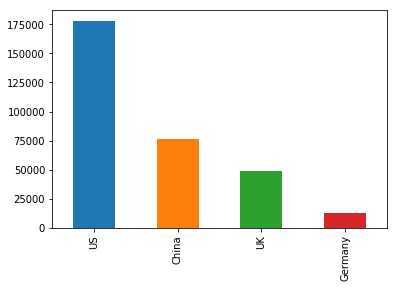

In [32]:
df['country'].value_counts().plot(kind='bar')

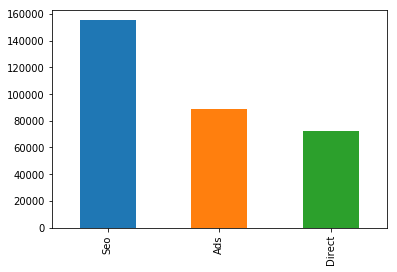

In [33]:
df['source'].value_counts().plot(kind='bar')

### 1.1 Check possible outlier

Then I checked whether there are outliers with extreme value in "age" or "total_pages_visited" and found out:

1.There are only two observations whose ages are greater than 100 while the age of all other observations is less than 80. However, it is still possible for human living longer than 123 years old. So, I decide to cap these two observations with 81(larger than 80, so I can tell these are capped observations).

2.The density of people visiting a given number of pages decreases gradually with the number of pages increases. This trend seems reasonable, so, I decide to leave it untounched.

#### Check "age"

In [94]:
print("the distribution of age:",np.percentile(df['age'], [90,95,99,100]))

the distribution of age: [ 42.  45.  52. 123.]


(array([1.25006e+05, 1.35764e+05, 4.77200e+04, 7.37900e+03, 3.23000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 17. ,  27.6,  38.2,  48.8,  59.4,  70. ,  80.6,  91.2, 101.8,
        112.4, 123. ]),
 <a list of 10 Patch objects>)

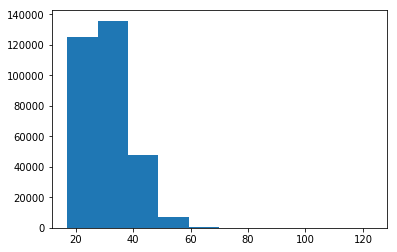

In [86]:
plt.hist(df['age'])

In [88]:
df_age52 = df[df['age']>52]

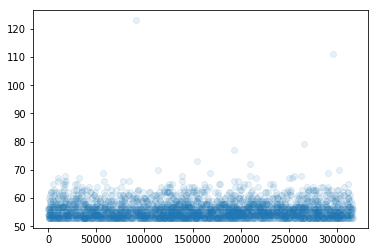

In [89]:
plt.scatter(x=df_age52.index.tolist(),y=df_age52['age'],alpha = 0.1)

In [93]:
print("the distribution of total_pages_visited:",np.percentile(df['total_pages_visited'], [90,95,99,100]))

the distribution of total_pages_visited: [ 9. 11. 17. 29.]


In [100]:
a = np.array(df['age'].values.tolist())
df['age'] = np.where(a > 80, 81, a).tolist()

#### Check "total_pages_visited"

(array([1.28436e+05, 1.07615e+05, 5.31670e+04, 1.70830e+04, 4.23600e+03,
        3.27000e+03, 1.69200e+03, 5.89000e+02, 1.02000e+02, 1.00000e+01]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

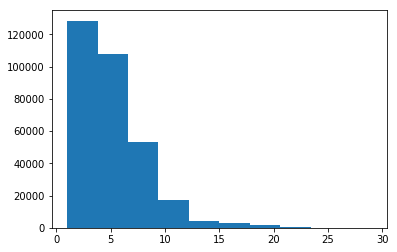

In [84]:
plt.hist(df['total_pages_visited'])

In [90]:
df_tpv17 = df[df['total_pages_visited']>17]

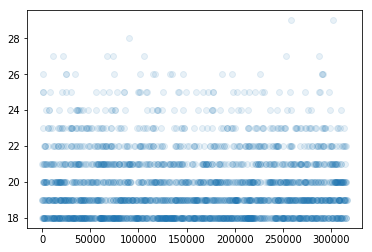

In [92]:
plt.scatter(x=df_tpv17.index.tolist(),y=df_tpv17['total_pages_visited'],alpha = 0.1)

### 1.2 Univariate Analysis

In [112]:
df['age_binned'] = pd.qcut(df['age'], 10)
df['tpv_binned'] = pd.qcut(df['total_pages_visited'], 5)

In [130]:
var_list = df.columns.tolist()
var_list.remove('age')
var_list.remove('total_pages_visited')
for i in var_list:
    print(df.groupby(i)['converted'].mean())

country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: converted, dtype: float64
new_user
0    0.072002
1    0.014021
Name: converted, dtype: float64
source
Ads       0.034483
Direct    0.028169
Seo       0.032895
Name: converted, dtype: float64
converted
0    0
1    1
Name: converted, dtype: int64
age_binned
(16.999, 20.0]    0.062725
(20.0, 23.0]      0.051624
(23.0, 25.0]      0.042051
(25.0, 28.0]      0.035249
(28.0, 30.0]      0.031294
(30.0, 32.0]      0.026141
(32.0, 35.0]      0.021403
(35.0, 38.0]      0.017621
(38.0, 42.0]      0.014521
(42.0, 81.0]      0.009362
Name: converted, dtype: float64
tpv_binned
(0.999, 2.0]    0.000118
(2.0, 3.0]      0.000251
(3.0, 5.0]      0.001151
(5.0, 7.0]      0.004893
(7.0, 29.0]     0.173435
Name: converted, dtype: float64
